In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import *

3 Support Vector Machines

In [3]:
X = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])
Y = np.array([-1,1,1,-1])

In [4]:
# Choose quadratic kernel (polynomial with d = 2, c = 1)
K = []
for i in range(4):
  Ki = []
  for j in range(4):
    temp = (1 + np.dot(X[i],X[j])) ** 2
    Ki.append(temp)
  K.append(Ki)
print(K)


[[9, 1, 1, 1], [1, 9, 1, 1], [1, 1, 9, 1], [1, 1, 1, 9]]


In [5]:
# solve for the alpha that would maximize the function
a1,a2,a3,a4 = symbols('a1,a2,a3,a4',real=True)

A = [a1,a2,a3,a4]
M = 0
for i in range(4):
  for j in range (4):
    M += A[i] * Y[i] * K[i][j] * Y[j] * A[j]
M = a1+a2+a3+a4 - (0.5) * M

Answer = solve([M.diff(a1),M.diff(a2),M.diff(a3),M.diff(a4)],[a1,a2,a3,a4])

for i in range(len(A)):
  A[i] = Answer[A[i]]
A = np.array(A)
#nonlinsolve([M.diff(a1),M.diff(a2),M.diff(a3),M.diff(a4)],[a1,a2,a3,a4])

In [6]:
# find optimal w and b
w = 0
for i in range(4): 
  w += A[i]*Y[i]*X[i]
b = Y - np.dot(X,w)

In [7]:
# put T = [x1,x2] inside and return y
def SVM(T): 
  svm = 0
  for i in range(4): 
    K = (1+np.dot(X[i],T))**2
    svm += A[i] * Y[i] * K + b[i]
  return sign(svm)

In [8]:
# plotting SVM
i = -5
j = -5
plane = []
positive = []
negative = []
zero = []
while i <= 5:
  j = -5
  while j <= 5:
    #print([i,j])
    svm = SVM([i,j])
    if svm == 1:
      positive.append([i,j])
    elif svm == -1:
      negative.append([i,j])
    else: 
      zero.append([i,j])
    j += 0.05
    j = round(j, 2)
  i += 0.05
  i = round(i, 2)

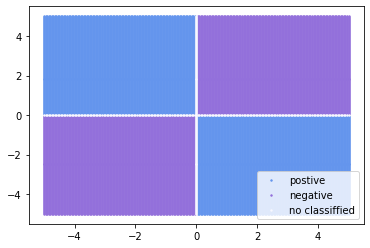

In [9]:
positive = np.array(positive)
negative = np.array(negative)
zero = np.array(zero)
plt.scatter(positive[:,0], positive[:,1], c = 'cornflowerblue',label='postive', s = 2)
plt.scatter(negative[:,0], negative[:,1], c = 'mediumpurple',label='negative', s = 2)
plt.scatter(zero[:,0], zero[:,1], c = 'ghostwhite',label='no classiffied', s = 2)
plt.legend(loc = 'lower right')
plt.show()